# Convolutional Autoencoders

Neste notebook, mostrando como usar o Keras para criar um autoenconder usando redes convolutionais para o dataset MNIST.

In [ ]:
import keras
from keras.models import Model
from keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# Load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1)) 

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

11501568/11490434 [==============================] - 0s 0us/step
x_train shape = (60000, 28, 28, 1)
x_test shape = (10000, 28, 28, 1)


In [ ]:
# Definindo o autoencoder convolucional com a Functional API
# A API funcional é uma forma de construir a rede como um grafo onde os nós são camadas. 

# Input() is used to instantiate a Keras tensor with the given shape.
input = Input(shape=(28,28,1), name='entrada')
# name: An optional name string for the layer. Should be unique in a model 
# (do not reuse the same name twice). It will be autogenerated if it isn't provided.

# Criamos um novo nó no gráfico de camadas chamando uma camada neste objeto input
# Defina a 1a camada de 16 filtros, todos de tamanho (3,3) 
conv = Convolution2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='conv_1')
# Este layer conv is callable: podemos passar o objeto input para ele para criar a rede 
x = conv(input)

# o parâmetro padding recebe o argumento 'same', o que significa que a saída tem a 
# mesma dimensão (shape) que a entrada
# Obs: Conv2D é um alias para Convolution2D em Keras. Tanto faz qual você vai usar.

# Outra maneira equivalente é definir o layer e já aplicá-lo ao objeto input:
# x = Convolution2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', name='conv_1')(input)

# 2a camada: maxpool com filtro 2x2. Default é usar strides=None. Saída terá metade do tamanho da entrada.
maxp = MaxPooling2D(pool_size=(2,2), padding='same')
x = maxp(x)
# Outra maneira equivalente de é usar 
# x = MaxPooling2D(pool_size=(2,2), padding='same')(x)
# Você cria um novo nó no layer graph chamando uma camada (convolution or maxpool) neste objeto de entrada

# Demais camadas sucessivas, diminuindo o tamanho de cada camada
x = Convolution2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',name='conv_2')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

x = Convolution2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',name='conv_3')(x)
x = MaxPooling2D(pool_size=(2,2), padding='same')(x)

# Vamos agora especificar os nós do grafo de camadas associados com o decoder
x = Convolution2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',name='conv_4')(x)

# Camada UpSampling com size=(a,b) --> repetimos cada linha a vezes e cada coluna b vezes 
x = UpSampling2D(size=(2,2))(x)
# By default, UpSampling2D will double each input dimension by repeating
# the rows and columns provided as input in the output. 
# Assim, podíamos ter escrito apenas 
# x = UpSampling2D()(x)
# UpSampling não aceita um nome 

# Demais camadas
x = Convolution2D(filters=8, kernel_size=(3,3), padding='same', activation='relu',name='conv_5')(x)
x = UpSampling2D(size=(2,2))(x)

x = Convolution2D(filters=8, kernel_size=(3,3), activation='relu',name='conv_6')(x)
x = UpSampling2D(size=(2,2))(x)

output = Convolution2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid', name='output')(x)

model = Model(inputs= input, outputs=output, name='CAE')
model.summary()

for layer in model.layers:
    print(layer.name)
# No output shape, o string "None" é o batch size que não é conhecido ainda  

Model: "CAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 8)           584     

In [ ]:
# Compilando o modelo

model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Treinando o modelo (50 epochs demorou muito, é melhor usar menos epochs se for só demonstrar)

model.fit(x_train, x_train, batch_size=32, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1568
Epoch 2/50
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1169
Epoch 3/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1093
Epoch 4/50
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1050
Epoch 5/50
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1022
Epoch 6/50
1875/1875 [==============================] - 74s 40ms/step - loss: 0.1001
Epoch 7/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0987
Epoch 8/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0976
Epoch 9/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0967
Epoch 10/50
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0960
Epoch 11/50
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0953
Epoch 12/50
1875/1875 [==============================] - 76s 40

In [ ]:
out_imgs = model.predict(x_test)

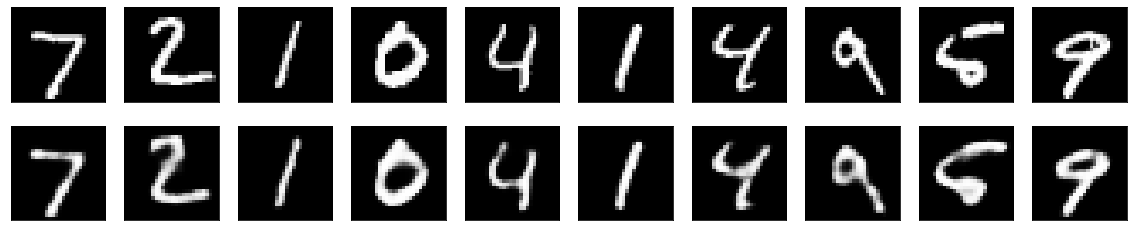

In [ ]:
# Visualizando 10 imagens de teste e a sua representação via autoencoder

n = 10
plt.figure(figsize=(20,4))

for i in range(n):
  ax = plt.subplot(2, n, i+1) # 10 plots originais na primeira linha 
  plt.imshow(x_test[i].reshape(28, 28)) # mostrando como imagem
  plt.gray()
  ax.get_xaxis().set_visible(False) # omitindo os eixos coordenados
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+1+n) # 10 plots na segunda linha 
  plt.imshow(out_imgs[i].reshape(28,28)) # usando as reconstruções 
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
plt.show()